In [2]:
import os
import charts_function_list

In [3]:
home,data,output = charts_function_list.folder_setup()

In [4]:
os.chdir(data)

In [5]:
skyscraper = pd.read_csv('US_skyscraper.csv') #pull in data
skyscraper['City_Recode'] = charts_function_list.numeric_code(skyscraper,'City') #recode City to numeric value

In [6]:
os.chdir(output)

In [ ]:
#function to re-code whether the bldg is complete or not
def completed(series,color1,color2):
    if series<=2017:
        return color1
    else:
        return color2

In [12]:
#define colors
color1 = '#d95f02'
color2 = '#1b9e77'
    
skyscraper['Completed_Color_Code']= skyscraper['Completed'].apply(completed,color1=color1,color2=color2)

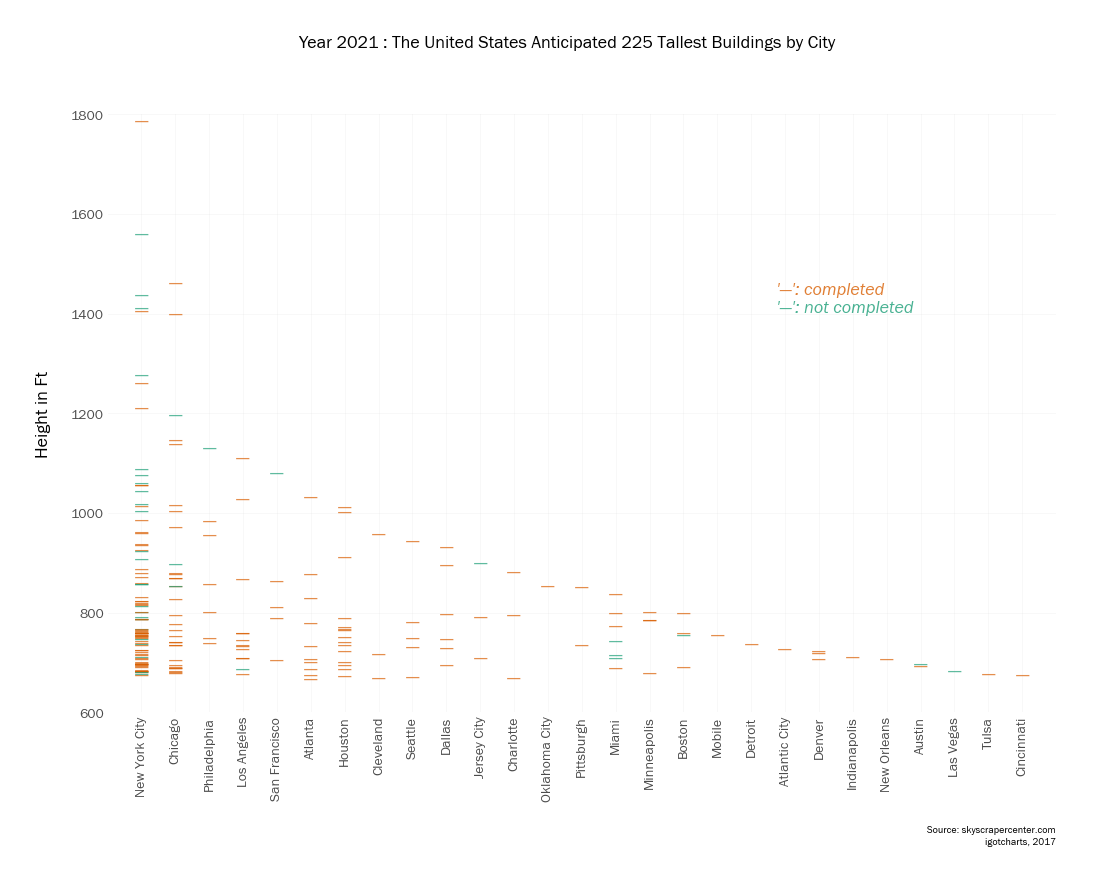

In [17]:
#set transparency variable
a=.7

#add figure, axis
fig = figure(figsize=(17,11))
fig.suptitle('Year 2021 : The United States Anticipated 225 Tallest Buildings by City',fontsize=18)
ax = fig.add_subplot(111)


#text scatter with em dash

for item in range(len(skyscraper)):
    ax.text(skyscraper['City_Recode'][item],skyscraper['Height (ft)'][item],'\u2014',ha='center',alpha=a
            ,
            color=skyscraper['Completed_Color_Code'][item],fontsize=20)
#axis labels
ax.set_ylabel('Height in Ft',fontsize=18,labelpad=20)

#x-ticks    
ax.set_xticks([x for x in range(1,28)])
ax.set_xticklabels(skyscraper['City'].unique(),rotation=90,fontsize=14,alpha=a)



#limits
ax.set_xlim(0,28)
ax.set_ylim(600,1800)

#yticks
ax.set_yticklabels([int(x) for x in ax.get_yticks()],fontsize=14,alpha=a)

#credits
ax.text(1,-.2,'Source: skyscrapercenter.com',transform=ax.transAxes,ha='right')
ax.text(1,-.22,'igotcharts, 2017',transform=ax.transAxes,ha='right')


ax.text(.7,.7,' \'\u2014\': completed',color=color1,
        transform=ax.transAxes,fontsize=18,ha='left',fontstyle='italic',alpha=.8)
ax.text(.7,.67,' \'\u2014\': not completed',color=color2,
        transform=ax.transAxes,fontsize=18,ha='left',fontstyle='italic',alpha=.8)

os.chdir(output)



plt.savefig('tallest_us_2021', 
            bbox_inches = 'tight', dpi = 300, pad_inches = .5,edgecolor = '#ffffff',facecolor = '#ffffff')